# Introduction

The Sickle Cell Dataset is the very first Uganda Based Data Collected of Its Kind. We are excited to have been among the first to interact with it. This Notebook shows how we trained a model to classify the Images. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
sample_image = "/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled/1.jpg"


In [3]:
image = plt.imread(sample_image)
print(image.shape)

(1028, 1000, 3)


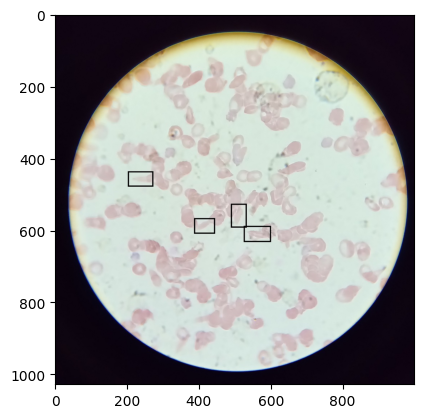

In [4]:
plt.imshow(image)

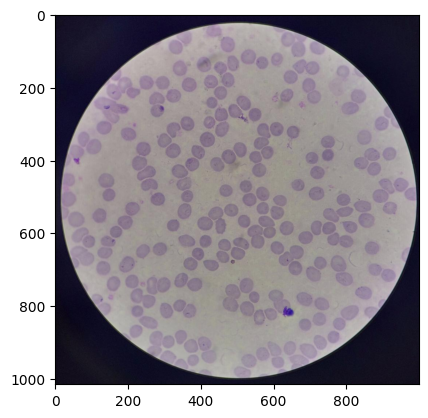

In [5]:
neg_image = plt.imread("/kaggle/input/sickle-cell-disease-dataset/Negative/Clear/1.jpg")
plt.imshow(neg_image)

In [6]:
import os

negative_imgs = len(os.listdir("/kaggle/input/sickle-cell-disease-dataset/Negative/Clear"))
positive_imgs = len(os.listdir("/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled"))

print("total images = ", (negative_imgs + positive_imgs))

total images =  569


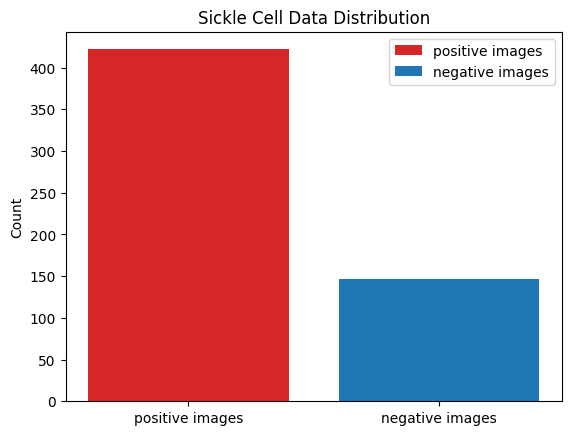

In [7]:
fig, ax = plt.subplots()

fruits = ['positive images', 'negative images']
counts = [positive_imgs, negative_imgs]
bar_labels = ['positive images', 'negative images']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Count')
ax.set_title('Sickle Cell Data Distribution')
ax.legend()


In [8]:
data_df = pd.DataFrame(columns = ["Image dir", "Label"])

In [9]:
positive_img_dir = "/kaggle/input/sickle-cell-disease-dataset/Positive/Labelled"
negative_img_dir = "/kaggle/input/sickle-cell-disease-dataset/Negative/Clear"

In [10]:
import os
import re
import cv2

Images = []
Labels = []

#append in the  postive Images
for file_dir, _, files in os.walk(positive_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(1)

In [11]:
#append in the negative Images
for file_dir, _, files in os.walk(negative_img_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        img = cv2.imread(img_file)
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(0)

In [12]:
Images = np.array(Images)

Images.shape

(569, 255, 255, 3)

Text(0.5, 1.0, 'Postive')

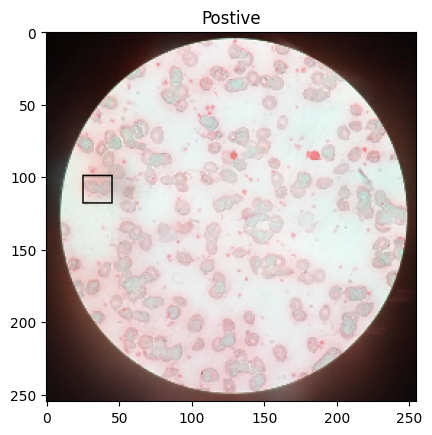

In [13]:
sample = Images[0]

plt.imshow(sample)
plt.title("Postive")

Text(0.5, 1.0, 'Negative')

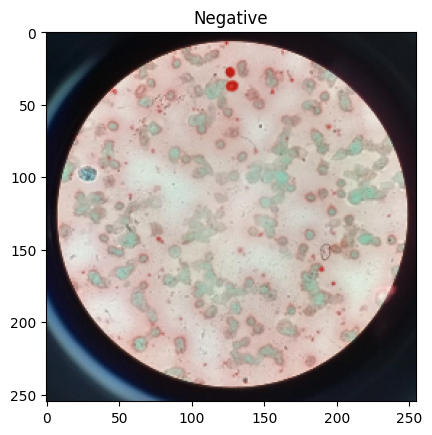

In [14]:
sample = Images[-1]
plt.imshow(sample)
plt.title("Negative")

# Train the models

In [15]:
X = Images / 255 #scale the data
y = Labels

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((455, 255, 255, 3), (114, 255, 255, 3), (455,), (114,))

In [18]:
np.unique(train_y, return_counts = True) , np.unique(test_y, return_counts = True)

((array([0, 1]), array([118, 337])), (array([0, 1]), array([29, 85])))

# Logistic Regression

Wen dealing with the normal ML models, we have to ensure the data is 2 dimensional, so the first step is to reshape the data to a 2d format

In [19]:
from sklearn.linear_model import LogisticRegression

train_X_flattened = train_X.reshape(len(train_X), -1)
test_X_flattened = test_X.reshape(len(test_X), -1)

In [20]:
train_X_flattened.shape

(455, 195075)

In [21]:
train_y.shape

(455,)

In [22]:
lr = LogisticRegression(random_state = 42).fit(train_X_flattened, train_y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [24]:
def get_score(y_pred, y_true):
    print("Accuracy score - ", accuracy_score(y_pred, y_true))
    print("Precision score - ", precision_score(y_pred, y_true))
    print("Recall score - ", recall_score(y_pred, y_true))
    print("f1 score - ", f1_score(y_pred, y_true))
    print("----------  Classification Report   -------")
    print(classification_report(y_pred, y_true))
    
    matrix = confusion_matrix(y_pred, y_true)
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d')

In [25]:
pred = lr.predict(train_X_flattened)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



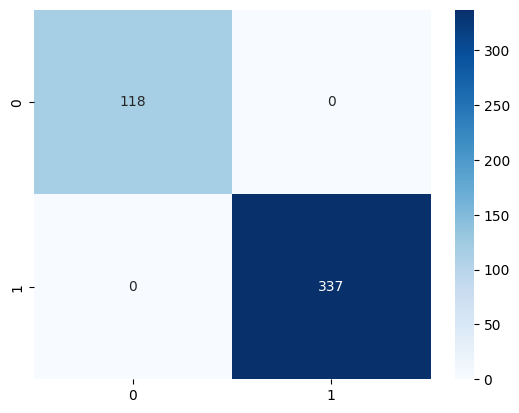

In [26]:
get_score(pred, train_y)

In [27]:
pred = lr.predict(test_X_flattened)

Accuracy score -  0.7982456140350878
Precision score -  0.8470588235294118
Recall score -  0.8780487804878049
f1 score -  0.8622754491017964
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        32
           1       0.85      0.88      0.86        82

    accuracy                           0.80       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.79      0.80      0.80       114



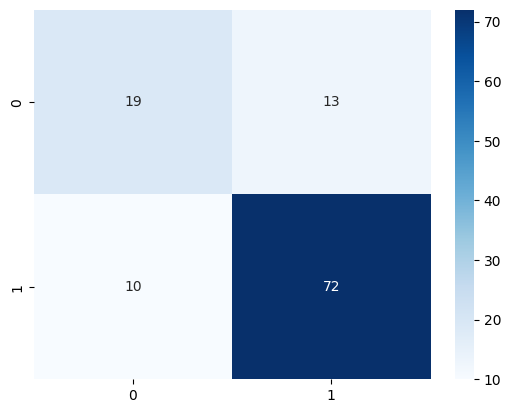

In [28]:
get_score(pred, test_y)

# Ridge Classifier

In [29]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



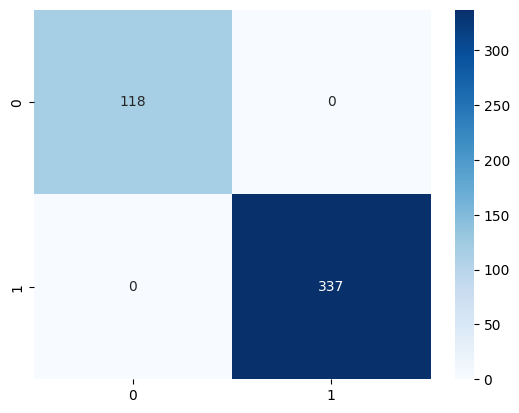

In [30]:
get_score(ridge.predict(train_X_flattened), train_y)

Accuracy score -  0.7719298245614035
Precision score -  0.8117647058823529
Recall score -  0.8734177215189873
f1 score -  0.8414634146341463
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.66      0.54      0.59        35
           1       0.81      0.87      0.84        79

    accuracy                           0.77       114
   macro avg       0.73      0.71      0.72       114
weighted avg       0.76      0.77      0.77       114



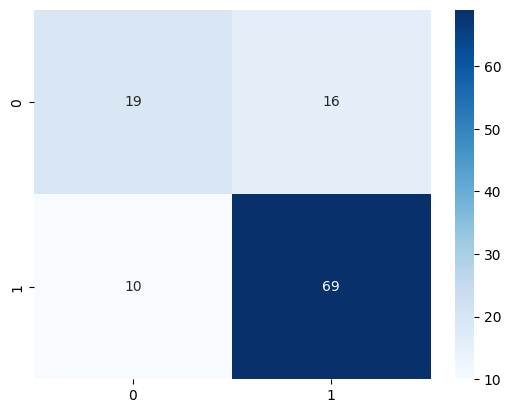

In [31]:
get_score(ridge.predict(test_X_flattened), test_y)

# SVM (Kernel Trick)

In [32]:
from sklearn.svm import SVC

svc = SVC(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  0.7406593406593407
Precision score -  1.0
Recall score -  0.7406593406593407
f1 score -  0.851010101010101
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85       455

    accuracy                           0.74       455
   macro avg       0.50      0.37      0.43       455
weighted avg       1.00      0.74      0.85       455



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


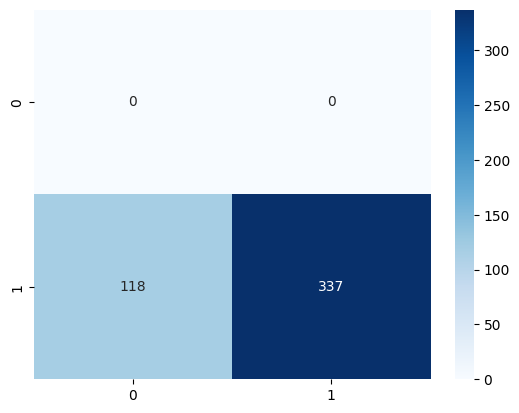

In [33]:
get_score(svc.predict(train_X_flattened), train_y)

Accuracy score -  0.7456140350877193
Precision score -  1.0
Recall score -  0.7456140350877193
f1 score -  0.8542713567839196
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.75      0.85       114

    accuracy                           0.75       114
   macro avg       0.50      0.37      0.43       114
weighted avg       1.00      0.75      0.85       114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


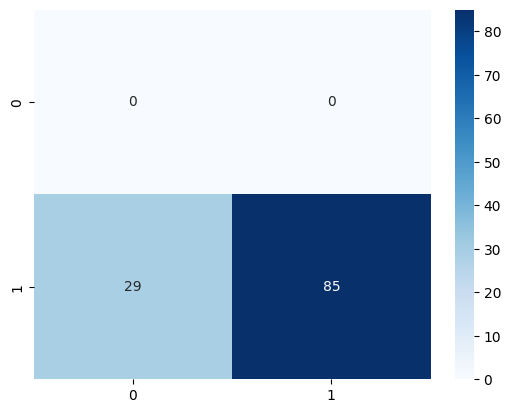

In [34]:
get_score(svc.predict(test_X_flattened), test_y)

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



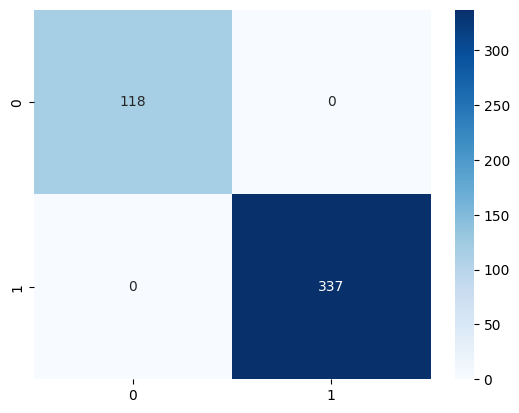

In [36]:
get_score(forest.predict(train_X_flattened), train_y)

Accuracy score -  0.7807017543859649
Precision score -  0.9647058823529412
Recall score -  0.7884615384615384
f1 score -  0.8677248677248677
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.24      0.70      0.36        10
           1       0.96      0.79      0.87       104

    accuracy                           0.78       114
   macro avg       0.60      0.74      0.61       114
weighted avg       0.90      0.78      0.82       114



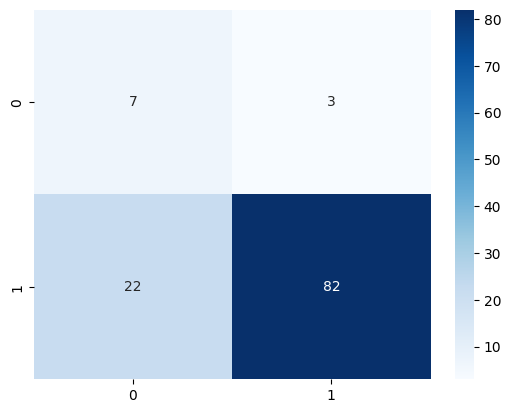

In [37]:
get_score(forest.predict(test_X_flattened), test_y)

# Extra Trees

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

xtree = ExtraTreesClassifier(random_state = 42).fit(train_X_flattened, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



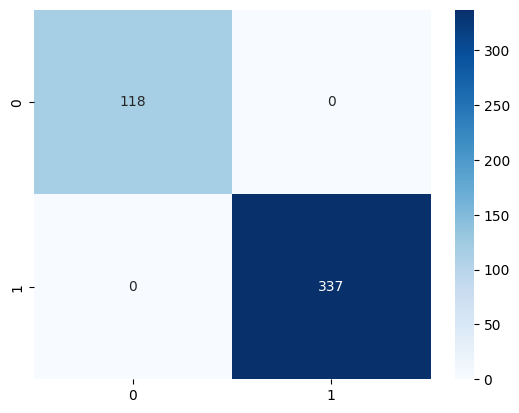

In [39]:
get_score(xtree.predict(train_X_flattened), train_y)

Accuracy score -  0.8333333333333334
Precision score -  0.9647058823529412
Recall score -  0.8367346938775511
f1 score -  0.8961748633879782
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.45      0.81      0.58        16
           1       0.96      0.84      0.90        98

    accuracy                           0.83       114
   macro avg       0.71      0.82      0.74       114
weighted avg       0.89      0.83      0.85       114



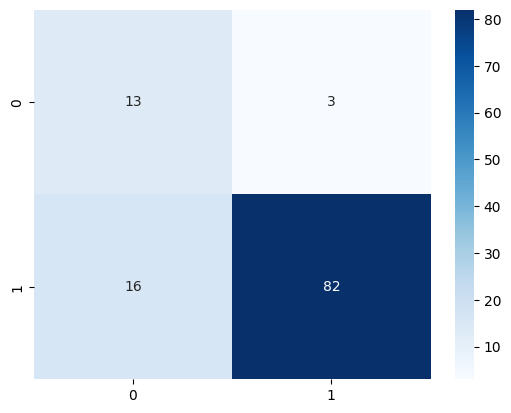

In [40]:
get_score(xtree.predict(test_X_flattened), test_y)

# CNN Model

In [41]:
from tensorflow import keras

2024-07-29 21:37:51.363812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 21:37:51.363940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 21:37:51.489512: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [42]:
# Importing all necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model

img_width, img_height = 255, 255
input_shape = (img_width, img_height, 3)

In [43]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,936,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949,185 (15.06 MB)

 Trainable params: 3,949,185 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

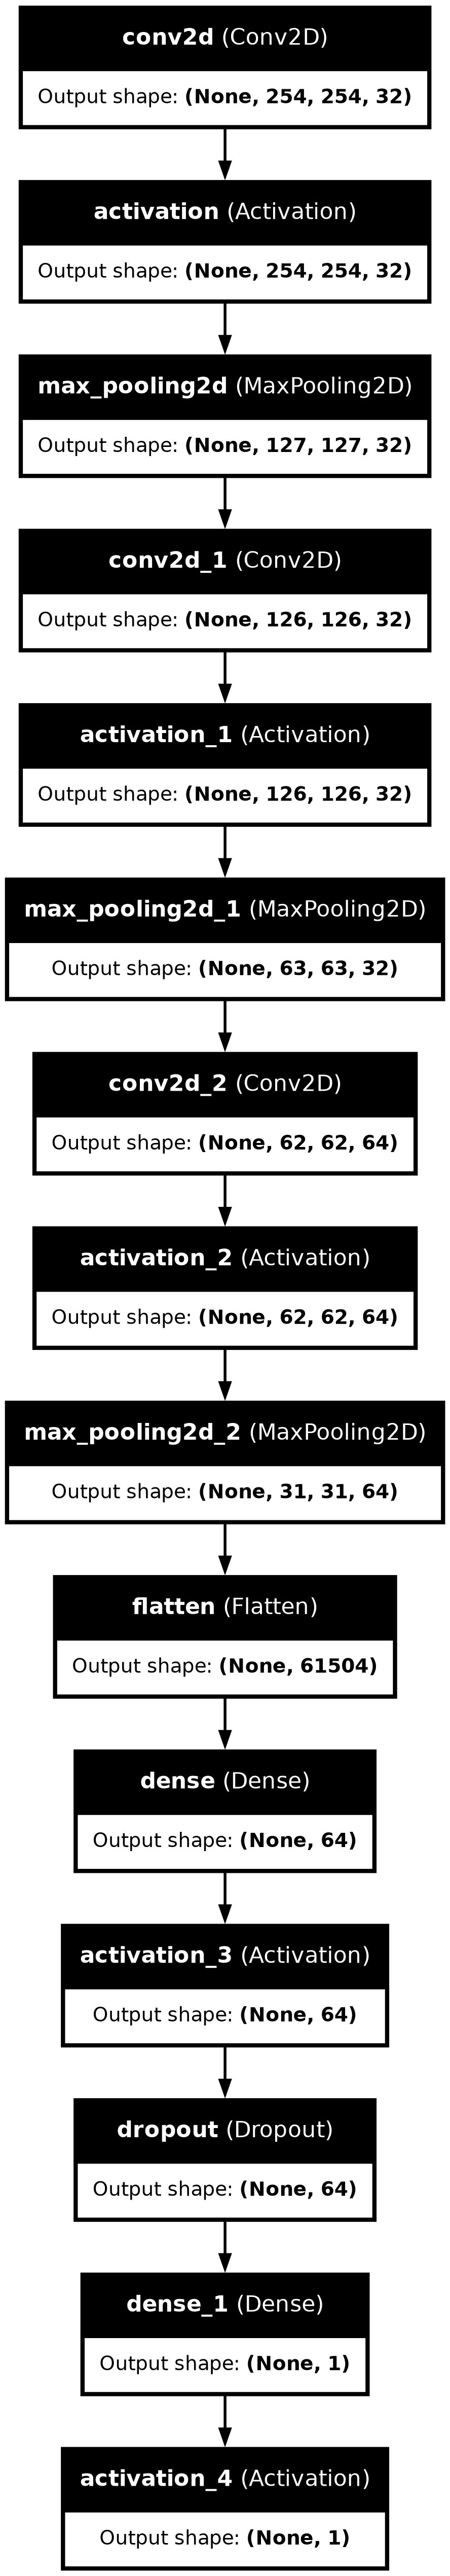

In [45]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [46]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
# Add a callback to avoid overfitting

model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = "best_model.keras",
    monitor='val_accuracy',
    save_best_only=True
)

In [48]:
history = model.fit(train_X, train_y, validation_data = (test_X, test_y),
          epochs = 20, callbacks = [model_checkpoint])

Epoch 1/20
 7/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6449 - loss: 1.2374

I0000 00:00:1722289090.915895      72 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 0.6333 - loss: 1.0925 - val_accuracy: 0.7456 - val_loss: 0.5516
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7196 - loss: 0.5986 - val_accuracy: 0.7456 - val_loss: 0.5455
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7529 - loss: 0.5621 - val_accuracy: 0.7456 - val_loss: 0.5291
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7510 - loss: 0.5299 - val_accuracy: 0.7456 - val_loss: 0.4861
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7194 - loss: 0.5028 - val_accuracy: 0.7456 - val_loss: 0.3685
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7357 - loss: 0.3560 - val_accuracy: 0.7456 - val_loss: 0.2839
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7720 - loss: 0.2820 - val_accuracy: 0.7632 - val_loss: 0.2787
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8854 - loss: 0.2069 - val_accuracy: 0.9474 - val_loss: 

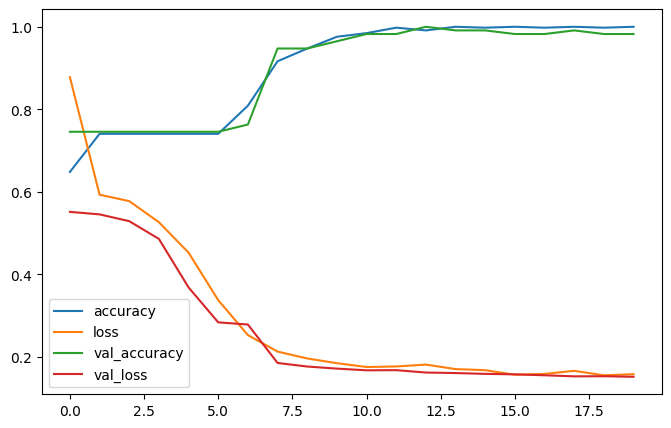

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [50]:
best_model = keras.models.load_model("/kaggle/working/best_model.keras")

# Test the model

In [51]:
predictions = best_model.predict(test_X)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [52]:
predictions = np.round(predictions)

In [53]:
y_pred = model.predict(train_X)
y_pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


array([[0.45090652],
       [1.        ],
       [1.        ],
       [0.45090652],
       [1.        ],
       [0.99914134],
       [1.        ],
       [0.99916786],
       [0.45090652],
       [0.99999595],
       [1.        ],
       [0.45090652],
       [1.        ],
       [0.45090652],
       [0.9999783 ],
       [0.45090652],
       [1.        ],
       [1.        ],
       [0.99998116],
       [1.        ],
       [0.45090652],
       [0.9999738 ],
       [0.99999714],
       [0.99999976],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.45090652],
       [1.        ],
       [0.45090652],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.99999976],
       [1.        ],
       [0.99999976],
       [0.99997187],
       [1.        ],
       [0.9999974 ],
       [0.9999999 ],
       [0.9999982 ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.999

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       118
         1.0       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



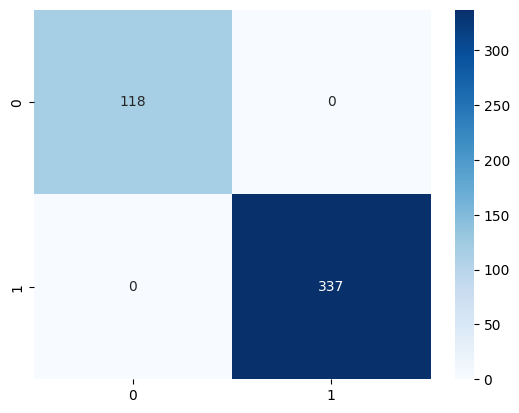

In [54]:
y_pred = np.round(y_pred)
get_score(y_pred, train_y)

Accuracy score -  1.0
Precision score -  1.0
Recall score -  1.0
f1 score -  1.0
----------  Classification Report   -------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        85

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



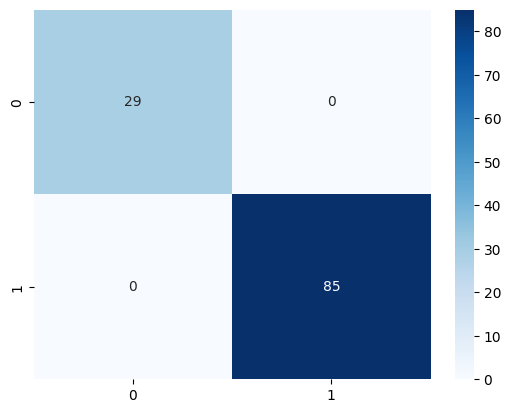

In [55]:
get_score(predictions, test_y)

# Model with Torch

In [56]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchvision import transforms
from PIL import Image
import random
import torchinfo

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
train_X_tensor, train_y_tensor,test_X_tensor,  test_y_tensor = torch.from_numpy(train_X * 255), torch.from_numpy(train_y), torch.from_numpy(test_X * 255), torch.from_numpy(test_y)

train_X_tensor

tensor([[[[14., 17., 22.],
          [14., 17., 22.],
          [15., 18., 23.],
          ...,
          [25., 28., 33.],
          [24., 28., 34.],
          [26., 30., 35.]],

         [[14., 17., 22.],
          [14., 17., 22.],
          [13., 16., 21.],
          ...,
          [25., 28., 33.],
          [24., 28., 33.],
          [25., 30., 34.]],

         [[12., 15., 20.],
          [14., 17., 22.],
          [13., 16., 21.],
          ...,
          [25., 28., 33.],
          [25., 29., 34.],
          [25., 29., 34.]],

         ...,

         [[15., 18., 23.],
          [15., 18., 23.],
          [17., 19., 25.],
          ...,
          [18., 21., 25.],
          [18., 21., 25.],
          [18., 21., 25.]],

         [[16., 19., 24.],
          [16., 19., 24.],
          [17., 20., 25.],
          ...,
          [17., 20., 24.],
          [18., 21., 25.],
          [18., 21., 25.]],

         [[16., 19., 24.],
          [16., 19., 24.],
          [17., 20., 25.],
         

In [58]:
class SickleCellDataset(Dataset):
    def __init__(self,tensors, transform = None):
        self.tensors = tensors
        self.transform = transform
        self.classes = ["Negative", "Positive"]
        self.class_to_idx = {"Negative" : 0, "Positive" : 1}
        
    def load_image(self, index):
        img_tensor = self.tensors[0][index]
        return Image.fromarray(img_tensor.numpy().astype(np.uint8))
        
    def __getitem__(self, index):
        x = self.load_image(index)
        
        if self.transform:
            x = self.transform(x)
            
        y = self.tensors[1][index]
        
        return x, y
    
    def __len__(self):
        return self.tensors[0].size(0)

In [59]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [60]:
train_dataset = SickleCellDataset(tensors = (train_X_tensor, train_y_tensor),
                                  transform = train_transforms)

test_data = SickleCellDataset(tensors = (test_X_tensor, test_y_tensor), 
                             transform = test_transforms)

In [61]:
len(train_dataset), len(test_data)

(455, 114)

In [62]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: list = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


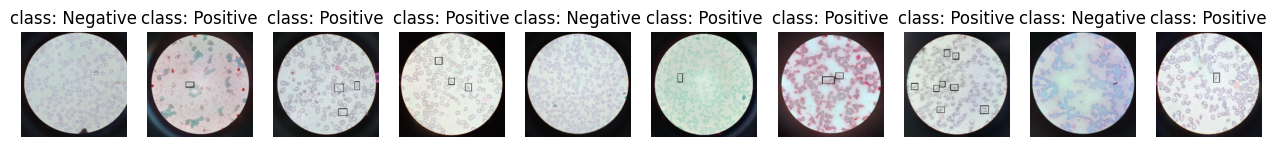

In [63]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_dataset, 
                      n=12, 
                      classes=train_dataset.classes,
                      seed=None) # Try setting the seed for reproducible images

In [64]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_dataset, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=2, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=2, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7c3f9e232410>,
 <torch.utils.data.dataloader.DataLoader at 0x7c3f9e230880>)

In [65]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [66]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [67]:
class DCNNSCD(nn.Module):
    def __init__(self,input_channels : int, output_shape : int):
        super().__init__()
        self.cnn_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels= input_channels,
                out_channels=32,
                kernel_size = 2,
                padding = 1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride = 2)
        )
        
        self.cnn_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels = 32,
                out_channels=64,
                kernel_size = 2,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride = 2)
        )
        
        self.cnn_block_3 = nn.Sequential(
            nn.Conv2d(
                in_channels = 64,
                out_channels= 64,
                kernel_size = 2,
                stride = 1,
                padding = 1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        
        self.output_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=50176, out_features=64),
            nn.Dropout(p=0.5),
            nn.Linear(in_features = 64, out_features=32),
            nn.Linear(in_features=32, out_features=1)
        )
        
    def forward(self, x):
        x = self.cnn_block_1(x)
        
        x = self.cnn_block_2(x)
        
        x = self.cnn_block_3(x)
        
        x = self.output_block(x)
        
        return x
    
    
model = DCNNSCD(input_channels=3, output_shape=1).to(device)
model

DCNNSCD(
  (cnn_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=50176, out_features=64, bias=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [68]:
input_batch, output_batch = next(iter(train_dataloader_custom))

img, label = input_batch[0].unsqueeze(axis = 0), output_batch[0]

img.shape, label

(torch.Size([1, 3, 224, 224]), tensor(0))

In [69]:
model.eval()

with torch.inference_mode():
    pred = model(img.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.sigmoid(pred)}\n")
print(f"Output prediction label:\n{torch.round(torch.sigmoid(pred)).squeeze(dim = 1)}\n")
print(f"Actual label:\n{label}")

Output logits:
tensor([[-0.0152]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4962]], device='cuda:0')

Output prediction label:
tensor([0.], device='cuda:0')

Actual label:
0


In [70]:
torchinfo.summary(model, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
DCNNSCD                                  [1, 1]                    --
├─Sequential: 1-1                        [1, 32, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 32, 225, 225]         416
│    └─ReLU: 2-2                         [1, 32, 225, 225]         --
│    └─MaxPool2d: 2-3                    [1, 32, 112, 112]         --
├─Sequential: 1-2                        [1, 64, 56, 56]           --
│    └─Conv2d: 2-4                       [1, 64, 113, 113]         8,256
│    └─ReLU: 2-5                         [1, 64, 113, 113]         --
│    └─MaxPool2d: 2-6                    [1, 64, 56, 56]           --
├─Sequential: 1-3                        [1, 64, 28, 28]           --
│    └─Conv2d: 2-7                       [1, 64, 57, 57]           16,448
│    └─ReLU: 2-8                         [1, 64, 57, 57]           --
│    └─MaxPool2d: 2-9                    [1, 64, 28, 28]           --
├─Seque

In [71]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X).squeeze(dim = 1)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y.float())
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.round(torch.sigmoid(y_pred))
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [72]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X).squeeze(dim = 1)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y.float())
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = torch.round(torch.sigmoid(test_pred_logits))
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [73]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.BCEWithLogitsLoss(),
          epochs: int = 10):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [74]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
torch.manual_seed(1234)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model, 
                        train_dataloader=train_dataloader_custom,
                        test_dataloader=test_dataloader_custom,
                        optimizer=optimizer, epochs = 20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9198 | train_acc: 0.7319 | test_loss: 0.5981 | test_acc: 0.7456
Epoch: 2 | train_loss: 0.5942 | train_acc: 0.7407 | test_loss: 0.5666 | test_acc: 0.7456
Epoch: 3 | train_loss: 0.5890 | train_acc: 0.7429 | test_loss: 0.5797 | test_acc: 0.7456
Epoch: 4 | train_loss: 0.5777 | train_acc: 0.7407 | test_loss: 0.5684 | test_acc: 0.7456
Epoch: 5 | train_loss: 0.5900 | train_acc: 0.7407 | test_loss: 0.5727 | test_acc: 0.7456
Epoch: 6 | train_loss: 0.6002 | train_acc: 0.7407 | test_loss: 0.5633 | test_acc: 0.7456
Epoch: 7 | train_loss: 0.6264 | train_acc: 0.7385 | test_loss: 0.5746 | test_acc: 0.7456
Epoch: 8 | train_loss: 0.5780 | train_acc: 0.7341 | test_loss: 0.4481 | test_acc: 0.7456
Epoch: 9 | train_loss: 0.2512 | train_acc: 0.8769 | test_loss: 0.0462 | test_acc: 0.9912
Epoch: 10 | train_loss: 0.2791 | train_acc: 0.9033 | test_loss: 0.1199 | test_acc: 0.9737
Epoch: 11 | train_loss: 0.0748 | train_acc: 0.9758 | test_loss: 0.0143 | test_acc: 0.9912
Epoch: 12 | train_l

In [75]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

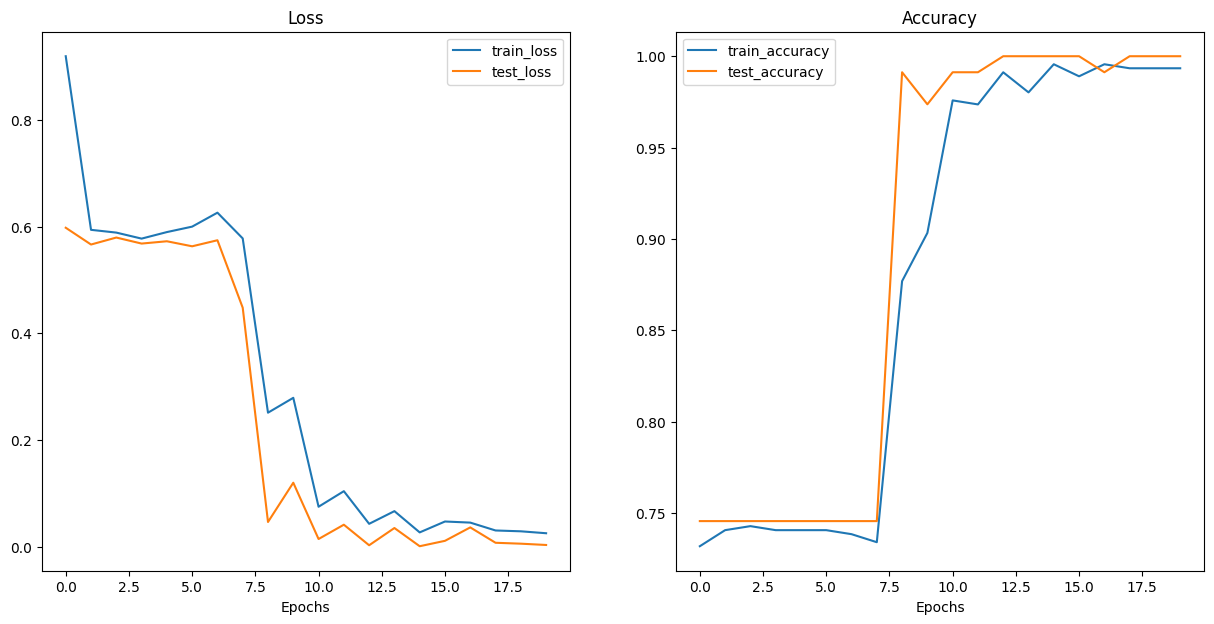

In [76]:
plot_loss_curves(model_results)

In [77]:
torch.save(model.state_dict(), "model state dict.pt")